<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [20]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [21]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [22]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [23]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.on from the test.

## Task 1

In [24]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [25]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [26]:
boston_df.drop('Unnamed: 0', axis = 1, inplace = True)

## Task 2

Text(0.5, 1.0, 'Median value of owner-occupied homes')

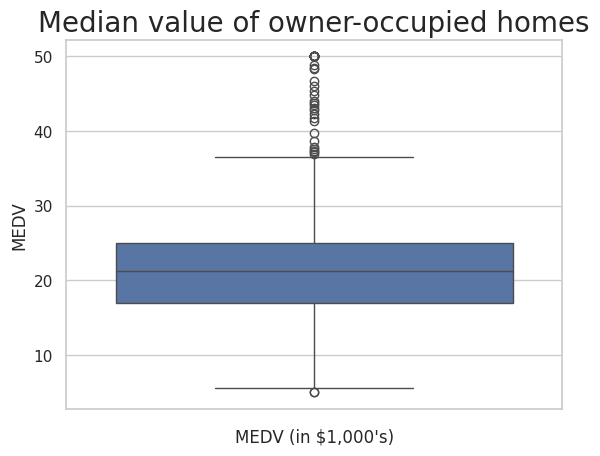

In [35]:
sns.boxplot(y = "MEDV", data = boston_df)
pyplot.xlabel("MEDV (in $1,000's)")
pyplot.title("Median value of owner-occupied homes", fontsize = 20)

Conclusion: Median: 21 

Text(0.5, 1.0, 'Median values for Houses bounded/not bounded by Charles River')

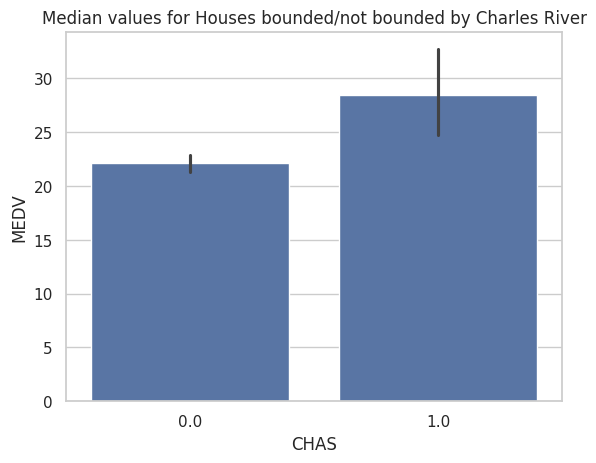

In [34]:
bar = sns.barplot(x = "CHAS", y = "MEDV", data = boston_df)
pyplot.title("Median values for Houses bounded/not bounded by Charles River")

Conclusion: Higher mediam values for "the hourses bounded by the Charles River".

Text(0, 0.5, "MEDV (in $1000's)")

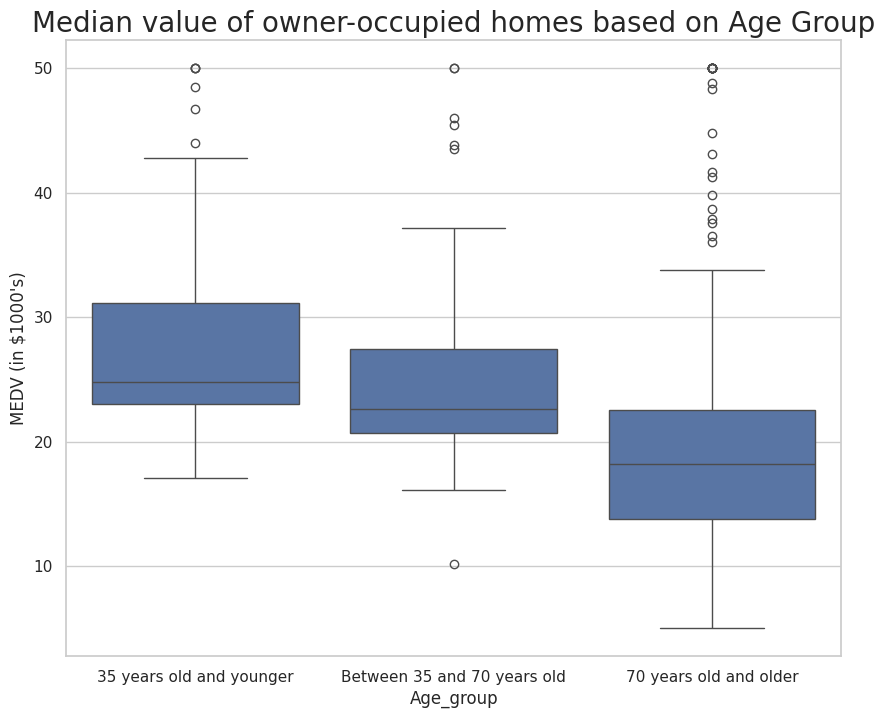

In [46]:
boston_df.loc[boston_df['AGE'] <= 35.0, 'Age_group'] = "35 years old and younger"
boston_df.loc[(boston_df['AGE'] > 35.0) & (boston_df['AGE'] < 70.0), 'Age_group'] = "Between 35 and 70 years old"
boston_df.loc[boston_df['AGE'] >= 70.0, 'Age_group'] = "70 years old and older"

fig,box3 = pyplot.subplots(figsize=(10,8))
box3 = sns.boxplot(x = "Age_group", y = "MEDV", data = boston_df, 
                 order = ["35 years old and younger", "Between 35 and 70 years old", "70 years old and older"])
pyplot.title("Median value of owner-occupied homes based on Age Group", fontsize = 20)
pyplot.ylabel("MEDV (in $1000's)")

Conclusion: Older the age, lower the median value of owner-occupied homes

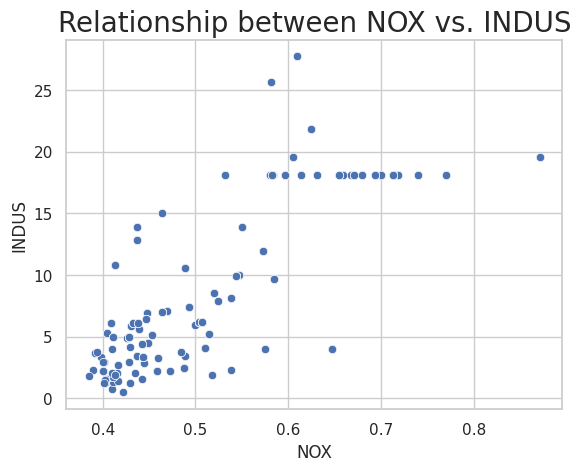

In [40]:
scatter = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
pyplot.title("Relationship between NOX vs. INDUS", fontsize = 20)

Conclusion: Shows a positive correction between two variables.

Text(0.5, 1.0, 'Distribution of pupil-teacher ratio by town')

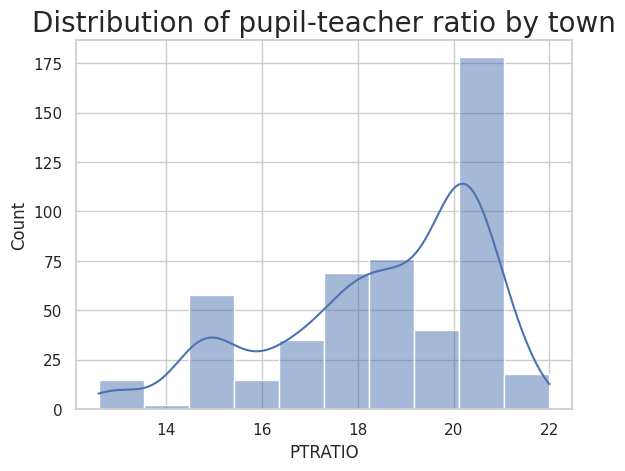

In [41]:
histogram = sns.histplot(x = "PTRATIO", data = boston_df, bins = 10, kde = True)
pyplot.title("Distribution of pupil-teacher ratio by town", fontsize = 20)

Conclusion: Highest Pupil to teach ratio occurs at 21.

## Task 3

### Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0:µ1=µ2  there is no difference in median value of houses on the Charles river; H1:µ1≠µ2  there is a difference in median value of houses on the Charles river

In [55]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

Answer: Statistical signifigance & Reject null hypothesis.

### Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0:µ1=µ2=µ3  (the three population means are equal); H1: At least one of the means differ

In [49]:
thirtyfive_lower_medv = boston_df[boston_df['Age_group'] == '35 years old and younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['Age_group'] == 'Between 35 and 70 years old']['MEDV']
seventy_older_medv = boston_df[boston_df['Age_group'] == '70 years old and older']['MEDV']

scipy.stats.levene(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv, center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [51]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Answer: Statistical signifigance & Reject null hypothesis.

### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.;
H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [52]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Answer: Reject null hypothesis. Linear relationship!

### Q4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0:β1  = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes);
H1:β1  is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [54]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        15:30:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: Statistical signifigance & Reject null hypothesis.